In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data ='/content/customer_booking.csv'

In [4]:
df = pd.read_csv(data,encoding='ISO-8859-1')

In [5]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


**EDA**

In [6]:
df.dtypes

num_passengers             int64
sales_channel             object
trip_type                 object
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                object
route                     object
booking_origin            object
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
booking_complete           int64
dtype: object

In [7]:
df.isnull().sum()  #in the dataset there is no null values

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [8]:
df.shape

(50000, 14)

In [9]:
df.booking_complete.value_counts()

0    42522
1     7478
Name: booking_complete, dtype: int64

I proceeded to import the mutual information classification from sklearn.feature_selection. This allows us to see the mutual dependence of a feature variable and the target variable.

**Mutual Information**

Mutual Information estimates mutual information for fixed categories like in a classification problem or a continuous target variable in regression problems. Mutual Information works on the entropy of the variables.

Mutual information(MI)between two random variables is a non-negative value,which measures the dependency between the variables .It is equal to zero if and only if two random variables are independent ,and higher values mean higher dependency.

In short, it is the amount of information one variable gives about the other.
Let us take two random variables there mutual information between them will be zero if and only if the variables are completely independent otherwise the mutual information between them would be symmetric and non-negative.

sklearn.feature_selection.mutual_info_classif
sklearn.feature_selection.mutual_info_regression
These are the two libraries provided by sklearn for using mutual information.

Let us start Mutual Information

In [10]:
X= df.drop('booking_complete',axis=1)
y= df.booking_complete

#changing object dtype to int dtype
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

In [11]:
X.dtypes   # converted object dtypes to interger

num_passengers             int64
sales_channel              int64
trip_type                  int64
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                 int64
route                      int64
booking_origin             int64
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
dtype: object

In [15]:
from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(X, y)
mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)

mi_scores # show a few features with their MI scores

route                    0.052915
booking_origin           0.048312
flight_duration          0.015347
length_of_stay           0.011106
wants_extra_baggage      0.009027
flight_day               0.005114
wants_in_flight_meals    0.005103
wants_preferred_seat     0.002655
flight_hour              0.002206
sales_channel            0.001459
purchase_lead            0.001179
num_passengers           0.000696
trip_type                0.000399
Name: MI Scores, dtype: float64

Here I am plotting MI scores with features

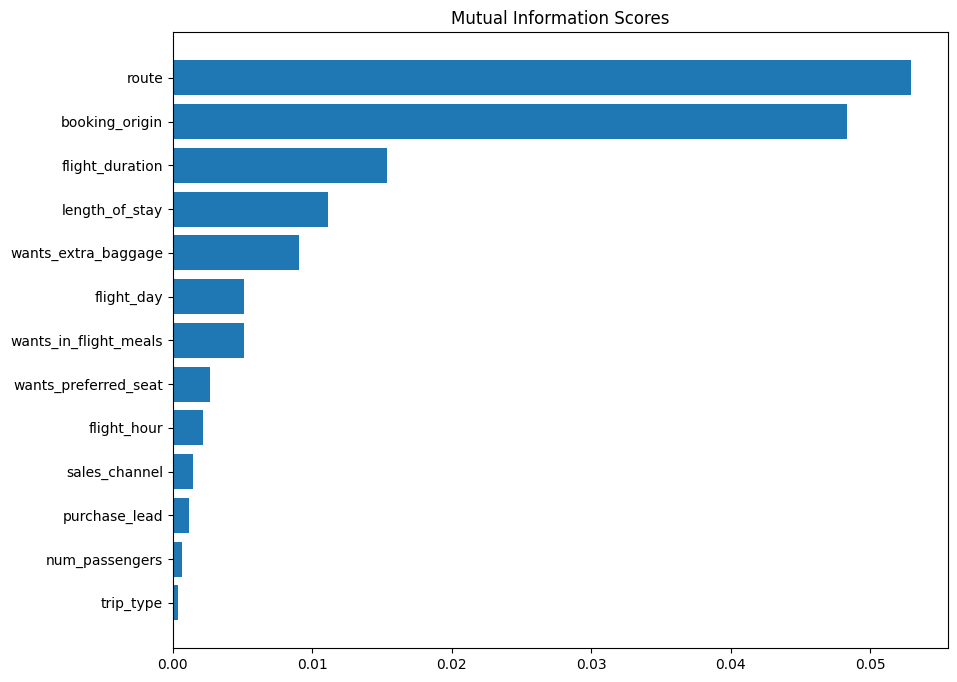

In [18]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width,scores)
    plt.yticks(width,ticks)
    plt.title('Mutual Information Scores')

plt.figure(dpi=100,figsize=(10,8))
plot_mi_scores(mi_scores)

From above graph

route
booking_origin
flight_duration
wants_extra_baggage
length_of_stay
are the top 5 features which are dependant with booking_complete feature

**Splitting dataset**

In [20]:
#test train split

from sklearn.model_selection import train_test_split

# dataset split
# creating a function for dataset split

def dataset(X,y):
    train_full_X, val_X, train_full_y, val_y = train_test_split(X, y,test_size=0.2,random_state = 0)

# Use the same function above for the validation set
    train_X, test_X, train_y, test_y = train_test_split(train_full_X, train_full_y, test_size=0.25,random_state = 0)
    return (train_X, val_X, train_y, val_y)

In [21]:
from sklearn.preprocessing import MinMaxScaler

def scale(X):
    scaler = MinMaxScaler()
    scaler.fit(X)
    return X


**Model 1 : Random forest classifier with top 6 Selected features**

In [23]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [25]:
#making a list to assign the features in the list
features = ['route','booking_origin','flight_duration','wants_extra_baggage','length_of_stay','num_passengers']
X = df[features]

In [26]:
#OHE
X =pd.get_dummies(X,columns=features)
X= scale(X)
y=df.booking_complete

In [27]:
X_train,X_val,y_train,y_val= dataset(X,y)


In [28]:
model_1_RF = RandomForestClassifier(random_state=1)
model_1_RF.fit(X_train,y_train)
pred = model_1_RF.predict(X_val)

In [29]:
print('Accuracy: ', accuracy_score(y_val,pred)*100)
print('Auc Score: ',roc_auc_score(y_val,pred))

Accuracy:  83.36
Auc Score:  0.5657818407546988


Hence I get accuracy upto 83% so I can select all features

**Model 2 : Random forest classifier with all features**

In [34]:
X= df.drop('booking_complete',axis=1)
# OHE
X = pd.get_dummies(X)
X =scale(X)
y=df.booking_complete

In [35]:
X_train,X_val,y_train,y_val=dataset(X,y)

In [36]:
model_2_RF = RandomForestClassifier(random_state=1)
model_2_RF.fit(X_train,y_train)
pred=model_2_RF.predict(X_val)

In [37]:
print ('Accuracy : ',accuracy_score(y_val,pred)*100)
print('AUC score: ',roc_auc_score(y_val,pred))

Accuracy :  84.76
AUC score:  0.5479604084813514


Got same accuracy level when X= df.drop('booking_complete',axis=1) was not wriiten when adding X= df.drop('booking_complete',axis=1) increases accuracy upto 84.76%

**Model 3 : XGB classifier with all features**

In [38]:
from xgboost import XGBClassifier

X= df.drop('booking_complete',axis=1)
#one hot encoding
X = pd.get_dummies(X)
X= scale(X)
y= df.booking_complete

X_train,X_val,y_train,y_val= dataset(X,y)


xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
prediction_xgb = xgb_model.predict(X_val)
print('ACCURACY: ',accuracy_score(y_val, prediction_xgb)*100)
print('AUC score: ',roc_auc_score(y_val,prediction_xgb))

ACCURACY:  84.98
AUC score:  0.5424676175552812


Finalizing random forest model with all features as final model, as it has goos accuracy and higher auc score compared to other 2 models

Validating with test data

In [41]:
X=df.drop('booking_complete',axis=1)
#OHE
X=pd.get_dummies(X)
X=scale(X)
y=df.booking_complete

full_train_X, test_X,full_train_y,test_y = train_test_split(X,y,test_size=0.2,random_state=0)

model_RF = RandomForestClassifier(random_state=1)
model_RF.fit(full_train_X,full_train_y)
pred = model_RF.predict(test_X)

In [42]:
print('Accuracy : ',accuracy_score(test_y,pred)*100)
print('AUC score : ',roc_auc_score(test_y,pred))

Accuracy :  85.09
AUC score :  0.5577796717361984
